In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

In [6]:
mood_means_sample1

,s1_baseline_mean,s1_neg_mean,s1_pro_mean,s1_baseline_std,s1_neg_std,s1_pro_std
erfolg_stolz,5.230769,5.115385,5.576923,1.632365,1.451259,1.677452
niedergeschlagen_bedrueckt_betruebt_traurig,2.307692,2.538462,2.153846,1.543223,1.529203,1.461296
waerme_zuneigung,4.807692,4.769231,5.076923,2.039985,2.065095,2.152637
frustration_enttaeuschung,1.923077,2.576923,2.346154,1.494606,1.629063,1.263085
froehlich_freudig_vergnuegt_entzueckt,5.884615,5.269231,5.615385,0.951921,1.638480,1.298520
peinlich,1.653846,2.038462,2.115385,0.745241,1.684773,1.632836
aerger_wut,1.500000,1.692308,1.461538,1.208305,1.257592,0.859338
erwartung,6.423077,6.192308,6.230769,0.945434,1.166850,1.106623
lustlos vs. neugierig,6.538462,5.730769,5.807692,1.240347,1.401647,1.327230
unangenehm vs. angenehm,6.576923,6.192308,6.307692,0.945434,1.020558,1.192283


In [2]:
mood_data_sample1 = pd.read_csv('/home/michael/master_thesis/mood/mood_data_sample1.tsv', sep='\t')
mood_data_sample2 = pd.read_csv('/home/michael/master_thesis/mood/mood_data_sample2.tsv', sep='\t')
mood_means_sample1 = pd.read_csv('/home/michael/master_thesis/s1_mood_means_std.tsv', sep='\t', index_col=[0])
mood_means_sample2 = pd.read_csv('/home/michael/master_thesis/s2_mood_means_std.tsv', sep='\t', index_col=[0])

questionnaire_data = data = pd.read_csv('/home/michael/Desktop/corrected_data_questionnaires.tsv', sep='\t')
questionnaires_sum_scores = pd.read_csv('/home/michael/Desktop/sum_scores.tsv', sep='\t')

mood_data_sample2.columns

mood_data_sample2.columns

mood_data_sample1 = pd.read_csv('/home/michael/git/master_thesis/data/mood_data_sample1.tsv', sep='\t')
mood_data_sample2 = pd.read_csv('/home/michael/git/master_thesis/data/mood_data_sample2.tsv', sep='\t')

questionnaire_data = data = pd.read_csv('/home/michael/git/master_thesis/data/corrected_data_questionnaires.tsv', sep='\t')
questionnaires_sum_scores = pd.read_csv('/home/michael/git/master_thesis/data/sum_scores.tsv', sep='\t')

#  subject identifier
subj_id = ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18',
           '19', '20', '21', '22', '23', '24', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
           '38', '39']



# experimental condition: positive first = 1; negative first = 2
order = [1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1]

# add condition and identifier to data
questionnaire_data['vpn_num'] = subj_id
questionnaire_data['order'] = order

questionnaires_sum_scores['vpn_num'] = subj_id
questionnaires_sum_scores['order'] = order


# clean-up df for further analysis
questionnaires_sum_scores = questionnaires_sum_scores.drop(['neo-extraversion_sum_score',
                                                            'neo-neuroticism_sum_score',
                                                            'neo-aggreeablness_sum_score',
                                                            'mae_sum_score'], axis=1)

## MOOD DATA

# calculate means where previous analysis indicated them as apropriate to make both samples better comparable
erfolg_stolz = mood_data_sample2.loc[: , "Erfolg":"Stolz"]
mood_data_sample2['erfolg_stolz'] = erfolg_stolz.mean(axis=1)

froh_freudig = mood_data_sample2.loc[: , "Fröhlichkeit":"Freude"]
mood_data_sample2['froh_freudig'] = froh_freudig.mean(axis=1)

# drop redundant/non-informative data
mood_data_sample2 = mood_data_sample2.drop(['Trauer', 'Erfolg', 'Stolz', 'Fröhlichkeit', 
                                            'Freude', 'Wärme', 'Frustration', 'Ärger', 
                                            'gelangweilt vs. motiviert', 'negativ vs. positiv', 
                                            'gleichgueltig vs. interesse', 'ruhig vs. nervoes'], axis=1)



mood_data_sample1 = mood_data_sample1.drop(['lustlos vs. neugierig'], axis=1)

# rename columns for data merging between samples
mood_data_sample1 = mood_data_sample1.rename(columns={'niedergeschlagen_bedrueckt_betruebt_traurig':
                                                      'Niedergeschlagenheit',
                                                      'waerme_zuneigung':'Zuneigung',
                                                      'frustration_enttaeuschung':'Enttäuschung',
                                                      'froehlich_freudig_vergnuegt_entzueckt':'froh_freudig',
                                                      'aerger_wut':'Wut',
                                                      'peinlich':'Peinlichkeit',
                                                      'erwartung':'Erwartung'
                                                     })

mood_data = pd.concat([mood_data_sample1, mood_data_sample2])

mood_data = mood_data.sort_values(['code'], ascending=True)

# exclude participants number 25 and 26, as there is no clean questionnaire data for those
mood_data = mood_data[mood_data.code != 1025]
mood_data = mood_data[mood_data.code != 2025]
mood_data = mood_data[mood_data.code != 3025]
mood_data = mood_data[mood_data.code != 1026]
mood_data = mood_data[mood_data.code != 2026]
mood_data = mood_data[mood_data.code != 3026]


# expand identifier and condition list for continous format
mood_data_order = order * 3
mood_data['order'] = mood_data_order
mood_data_vpn_num = subj_id *3
mood_data['vpn_num'] = mood_data_vpn_num

mood_data.reset_index(drop=True, inplace=True)


# rename columns for data merging between samples
mood_data_sample1 = mood_data_sample1.rename(columns={'niedergeschlagen_bedrueckt_betruebt_traurig':
                                                      'Niedergeschlagenheit',
                                                      'waerme_zuneigung':'Zuneigung',
                                                      'frustration_enttaeuschung':'Enttäuschung',
                                                      'froehlich_freudig_vergnuegt_entzueckt':'froh_freudig',
                                                      'aerger_wut':'Wut',
                                                      'peinlich':'Peinlichkeit',
                                                      'erwartung':'Erwartung'
                                                     })

# exclude participants number 25 and 26, as there is no clean questionnaire data for those
mood_data = mood_data[mood_data.code != 1025]
mood_data = mood_data[mood_data.code != 2025]
mood_data = mood_data[mood_data.code != 3025]
mood_data = mood_data[mood_data.code != 1026]
mood_data = mood_data[mood_data.code != 2026]
mood_data = mood_data[mood_data.code != 3026]


mood_data.reset_index(drop=True, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(mood_data)

# split dataframe by condition
grouped = mood_data.groupby(mood_data.condition)

mood_data_baseline = grouped.get_group("baseline")
mood_data_neg = grouped.get_group("negative")
mood_data_pos = grouped.get_group("positive")

mood_data_baseline.reset_index(drop=True, inplace=True)
mood_data_neg.reset_index(drop=True, inplace=True)
mood_data_pos.reset_index(drop=True, inplace=True)


# split dataframe by order (pos or neg first)
grouped = mood_data.groupby(mood_data.order)

mood_data_pos_first = grouped.get_group(1)
mood_data_neg_first = grouped.get_group(2)


mood_data_pos_first.reset_index(drop=True, inplace=True)
mood_data_neg_first.reset_index(drop=True, inplace=True)

# split dataframe into blocks (pos condition)
grouped = mood_data_pos_first.groupby(mood_data_pos_first.condition)

mood_data_baseline_pos_first = grouped.get_group("baseline")
mood_data_neg_pos_first = grouped.get_group("negative")
mood_data_pos_pos_first = grouped.get_group("positive")

mood_data_baseline_pos_first.reset_index(drop=True, inplace=True)
mood_data_neg_pos_first.reset_index(drop=True, inplace=True)
mood_data_pos_pos_first.reset_index(drop=True, inplace=True)

# split dataframe into blocks (neg condition)
grouped = mood_data_neg_first.groupby(mood_data_neg_first.condition)

mood_data_baseline_neg_first = grouped.get_group("baseline")
mood_data_neg_neg_first = grouped.get_group("negative")
mood_data_pos_neg_first = grouped.get_group("positive")

mood_data_baseline_neg_first.reset_index(drop=True, inplace=True)
mood_data_neg_neg_first.reset_index(drop=True, inplace=True)
mood_data_pos_neg_first.reset_index(drop=True, inplace=True)


# rename columns for data merging between experimental conditions 
mood_data_baseline_pos_first = mood_data_baseline_pos_first.rename(
                                                columns={'erfolg_stolz':'erfolg_stolz_baseline',
                                                         'Niedergeschlagenheit':'Niedergeschlagenheit_baseline',
                                                         'Zuneigung':'Zuneigung_baseline',
                                                         'Enttäuschung':'Enttäuschung_baseline',
                                                         'froh_freudig':'froh_freudig_baseline',
                                                         'Peinlichkeit':'Peinlichkeit_baseline',
                                                         'Wut':'Wut_baseline',
                                                         'Erwartung':'Erwartung_baseline',
                                                         'unangenehm vs. angenehm':'unangenehm vs. angenehm baseline',
                                                         'entspannt vs. angespannt':'entspannt vs. angespannt baseline'
                                                        })

# rename columns for data merging between experimental conditions 
mood_data_neg_pos_first = mood_data_neg_pos_first.rename(
                                                columns={'erfolg_stolz':'erfolg_stolz_negative',
                                                         'Niedergeschlagenheit':'Niedergeschlagenheit_negative',
                                                         'Zuneigung':'Zuneigung_negative',
                                                         'Enttäuschung':'Enttäuschung_negative',
                                                         'froh_freudig':'froh_freudig_negative',
                                                         'Peinlichkeit':'Peinlichkeit_negative',
                                                         'Wut':'Wut_negative',
                                                         'Erwartung':'Erwartung_negative',
                                                         'unangenehm vs. angenehm':'unangenehm vs. angenehm negative',
                                                         'entspannt vs. angespannt':'entspannt vs. angespannt negative'
                                                        })

# rename columns for data merging between experimental conditions 
mood_data_pos_pos_first = mood_data_pos_pos_first.rename(
                                                columns={'erfolg_stolz':'erfolg_stolz_positive',
                                                         'Niedergeschlagenheit':'Niedergeschlagenheit_positive',
                                                         'Zuneigung':'Zuneigung_positive',
                                                         'Enttäuschung':'Enttäuschung_positive',
                                                         'froh_freudig':'froh_freudig_positive',
                                                         'Peinlichkeit':'Peinlichkeit_positive',
                                                         'Wut':'Wut_positive',
                                                         'Erwartung':'Erwartung_positive',
                                                         'unangenehm vs. angenehm':'unangenehm vs. angenehm positive',
                                                         'entspannt vs. angespannt':'entspannt vs. angespannt positive'
                                                        })

mood_data_baseline_pos_first = mood_data_baseline_pos_first.drop(['code', 'order', 'vpn_num', 'condition'], axis=1)
mood_data_neg_pos_first = mood_data_neg_pos_first.drop(['code', 'order', 'vpn_num', 'condition'], axis=1)
mood_data_pos_pos_first = mood_data_pos_pos_first.drop(['code', 'order', 'vpn_num', 'condition'], axis=1)

# rename columns for data merging between experimental conditions 
mood_data_baseline_neg_first = mood_data_baseline_neg_first.rename(
                                                columns={'erfolg_stolz':'erfolg_stolz_baseline',
                                                         'Niedergeschlagenheit':'Niedergeschlagenheit_baseline',
                                                         'Zuneigung':'Zuneigung_baseline',
                                                         'Enttäuschung':'Enttäuschung_baseline',
                                                         'froh_freudig':'froh_freudig_baseline',
                                                         'Peinlichkeit':'Peinlichkeit_baseline',
                                                         'Wut':'Wut_baseline',
                                                         'Erwartung':'Erwartung_baseline',
                                                         'unangenehm vs. angenehm':'unangenehm vs. angenehm baseline',
                                                         'entspannt vs. angespannt':'entspannt vs. angespannt baseline'
                                                        })

# rename columns for data merging between experimental conditions 
mood_data_neg_neg_first = mood_data_neg_neg_first.rename(
                                                columns={'erfolg_stolz':'erfolg_stolz_negative',
                                                         'Niedergeschlagenheit':'Niedergeschlagenheit_negative',
                                                         'Zuneigung':'Zuneigung_negative',
                                                         'Enttäuschung':'Enttäuschung_negative',
                                                         'froh_freudig':'froh_freudig_negative',
                                                         'Peinlichkeit':'Peinlichkeit_negative',
                                                         'Wut':'Wut_negative',
                                                         'Erwartung':'Erwartung_negative',
                                                         'unangenehm vs. angenehm':'unangenehm vs. angenehm negative',
                                                         'entspannt vs. angespannt':'entspannt vs. angespannt negative'
                                                        })

# rename columns for data merging between experimental conditions 
mood_data_pos_neg_first = mood_data_pos_neg_first.rename(
                                                columns={'erfolg_stolz':'erfolg_stolz_positive',
                                                         'Niedergeschlagenheit':'Niedergeschlagenheit_positive',
                                                         'Zuneigung':'Zuneigung_positive',
                                                         'Enttäuschung':'Enttäuschung_positive',
                                                         'froh_freudig':'froh_freudig_positive',
                                                         'Peinlichkeit':'Peinlichkeit_positive',
                                                         'Wut':'Wut_positive',
                                                         'Erwartung':'Erwartung_positive',
                                                         'unangenehm vs. angenehm':'unangenehm vs. angenehm positive',
                                                         'entspannt vs. angespannt':'entspannt vs. angespannt positive'
                                                        })
mood_data_baseline_neg_first = mood_data_baseline_neg_first.drop(['code', 'order', 'vpn_num', 'condition'], axis=1)
mood_data_neg_neg_first = mood_data_neg_neg_first.drop(['code', 'order', 'vpn_num', 'condition'], axis=1)
mood_data_pos_neg_first = mood_data_pos_neg_first.drop(['code', 'order', 'vpn_num', 'condition'], axis=1)

# split dataframe by order
grouped = questionnaires_sum_scores.groupby(questionnaires_sum_scores.order)

questionnaires_sum_scores_pos_first = grouped.get_group(1)
questionnaires_sum_scores_neg_first = grouped.get_group(2)


questionnaires_sum_scores_pos_first.reset_index(drop=True, inplace=True)
questionnaires_sum_scores_neg_first.reset_index(drop=True, inplace=True)


,code,erfolg_stolz,Niedergeschlagenheit,Zuneigung,Enttäuschung,froh_freudig,Peinlichkeit,Wut,Erwartung,unangenehm vs. angenehm,entspannt vs. angespannt,condition,order,vpn_num
0,1002,4.0,5,6,4,4.0,1,6,6,7,4,baseline,1,02
1,1003,7.0,2,6,1,6.0,1,2,7,8,7,baseline,2,03
2,1004,7.0,1,7,1,5.0,1,1,8,8,8,baseline,1,04
3,1005,1.0,1,2,1,5.0,1,1,5,5,8,baseline,2,05
4,1006,4.0,1,5,1,6.0,3,1,6,-,-,baseline,1,06
5,1007,7.0,2,8,2,7.0,1,1,6,7,4,baseline,2,07
6,1008,5.0,6,1,1,5.0,1,1,5,5,9,baseline,1,08
7,1009,4.0,1,3,1,6.0,1,1,5,8,7,baseline,2,09
8,1010,5.0,3,3,2,5.0,2,1,6,5,6,baseline,1,10
9,1011,7.0,1,5,1,4.0,1,1,7,7,5,baseline,1,11


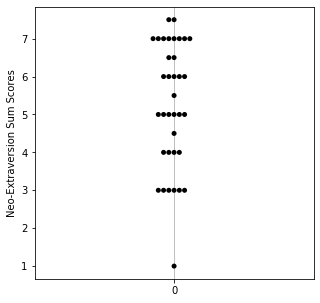

In [4]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))

# single observation
sns.swarmplot(data=mood_data_baseline['erfolg_stolz'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Neo-Extraversion Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/ne_sums_output.png", dpi=300, bbox_inches='tight')

In [3]:
mood_data_baseline.columns

Index(['code', 'erfolg_stolz', 'Niedergeschlagenheit', 'Zuneigung',
       'Enttäuschung', 'froh_freudig', 'Peinlichkeit', 'Wut', 'Erwartung',
       'unangenehm vs. angenehm', 'entspannt vs. angespannt', 'condition',
       'order', 'vpn_num'],
      dtype='object')